In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

### Amostra Imagem BSDS-500

In [2]:
path='/home/falreis/Me/mestrado/alo-seg-edge/code/datasets/BSDS500/data/groundTruth/train-val-png/'

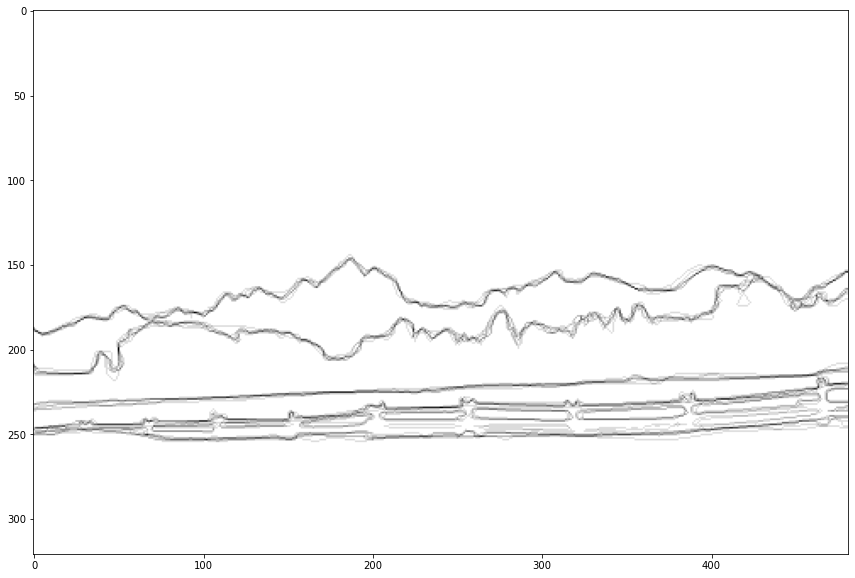

In [21]:
img = cv2.imread(path + '2092.png') 
img2 = img[:,:,0]

fig = plt.figure(figsize=(20,10))
plt.imshow(img2, cmap=plt.cm.binary)

### Mapas de Cores Classes Kitti

Percentual pixels bordas: 0.0640708933232298


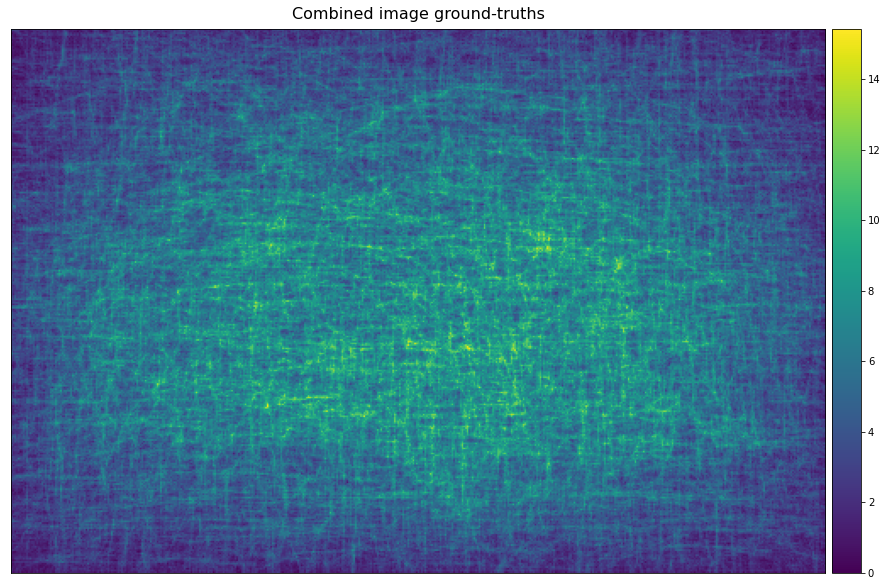

In [33]:
h=321
w=481

images = glob.glob("{}*.png".format(path)) #"{}2092.png".format(path)

soma = np.zeros((h, w))
estat = 0.

for im_path in images:
    img = cv2.imread(im_path)

    if(img.shape[0] != h):
        img = cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE)

    norm = img[:,:,0] / 255.
    soma += norm
    estat += np.sum([norm[:,:] > 0.]) / (h*w) #percentual pixels bordas
    
    #fig = plt.figure(figsize=(20,10))
    #plt.imshow(([norm[:,:] > 0.]*1)[0], cmap=plt.cm.inferno)

#imprime estatística pixels
print('Percentual pixels bordas:', estat/len(images))
    
#plota gráficos
fig = plt.figure(figsize=(20,10))
plt.imshow(soma, cmap=plt.cm.viridis)
plt.xticks([])
plt.yticks([])
plt.title('Combined image ground-truths', fontsize = 16, pad=10)

cax = fig.add_axes([0.8, 0.125, 0.02, 0.755])
plt.colorbar(spacing='uniform', cax=cax)

(11400, 110592, 2)
Percentual pixels bordas: 0.09787262775899432


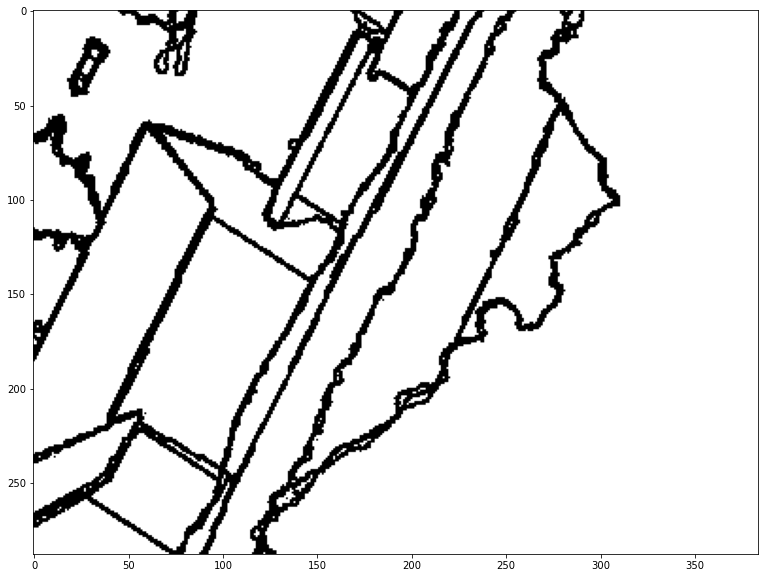

In [81]:
h = 288
w = 384

morph_path = '/home/falreis/Me/mestrado/alo-seg-edge/code/data/BSDS500/train_upper_2class_label_288x384_int8.npy'
train_data = np.load(morph_path)
print(train_data.shape)

estat = 0.

for img in train_data:
    train_reshape = np.reshape(img, (h, w, 2))
    #train_plot = train_reshape[:,:,1].astype(np.uint8)
    train_plot = train_reshape[:,:,1] *255
    #train_plot = train_plot.astype(np.uint8)
    
    estat += np.sum([train_plot[:,:] > 0]) / (h*w) #percentual pixels bordas
    
#imprime estatística pixels
print('Percentual pixels bordas:', estat/len(train_data))

fig = plt.figure(figsize=(20,10))
plt.imshow(train_plot.astype(np.uint8), cmap=plt.cm.binary)

#morph = 0.06076698466815884
#all = 0.08235134627928986
#upper = 0.09787262775899432